<a href="https://colab.research.google.com/github/rekuantsun/PTDL-Python/blob/main/TKMT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHAPTER 1

**Exploratory Data Analysis**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


**Median and Robust Estimates**

In [7]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv'
state = pd.read_csv(url, index_col=0)

In [12]:
state['Population'].mean()
stats.trim_mean(state['Population'], 0.1)
state['Population'].median()

4436369.5

In [14]:
!pip install wquantiles

In [16]:
import wquantiles

In [17]:
np.average(state['Murder.Rate'], weights=state['Population'])
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

**Estimates of Variability**

In [26]:
!pip install robust
!pip install statsmodels

In [33]:
import robust
import statsmodels as sm

In [31]:
state['Population'].std()
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
robust.scale.mad(state['Population'])

AttributeError: ignored

**Exploring the Data Distribution**

In [34]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

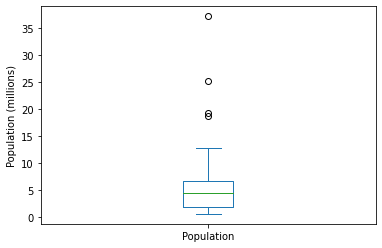

In [35]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

**Frequency Tables and Histograms**

In [36]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

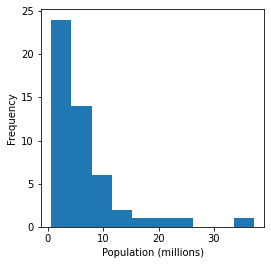

In [37]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

**Density Plots and Estimates**

Text(0.5, 0, 'Murder Rate (per 100,000)')

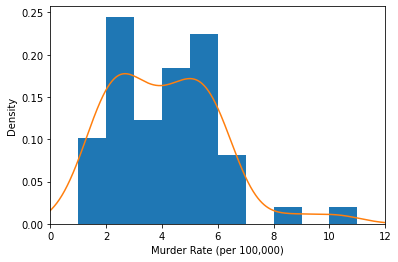

In [38]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

**Explorubg Binary and Categorical Data**

In [62]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/dfw_airline.csv'
dfw = pd.read_csv(url)

Text(0, 0.5, 'Count')

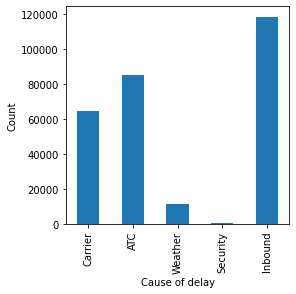

In [63]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

**Correlation**

In [46]:
from google.colab import drive 
drive.mount('/content/gdrive')
sp500_px = pd.read_csv('/content/gdrive/MyDrive/Học Lập Trình/Học kỳ 2/PTDL - Python /sp500_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [47]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
cmap=sns.diverging_palette(20, 220, as_cmap=True))

TypeError: ignored

**Scatterplots**

In [55]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

NameError: ignored

**EXploring Two or More Variables**

In [51]:
kc_tax = pd.read_csv('/content/gdrive/MyDrive/Học Lập Trình/Học kỳ 2/PTDL - Python /kc_tax.csv')

In [52]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
(kc_tax.SqFtTotLiving > 100) &
(kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape
(432693, 3)

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

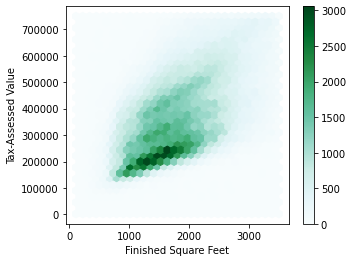

In [53]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [54]:
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

NameError: ignored

**Two Categorical Variables**

In [59]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv'
lc_loans = pd.read_csv(url)

In [61]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
aggfunc=lambda x: len(x), margins=True)
df = crosstab.loc['A':'G',:].copy()
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'],
axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

**Categorical and Numeric Data**

In [64]:
airline_stats = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

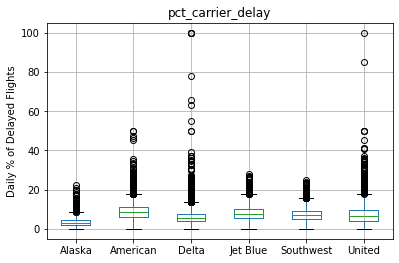

In [69]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

In [70]:
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

NameError: ignored

**Visualizing Multiple Variables**

In [72]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip
def hexbin(x, y, color, **kwargs):
cmap = sns.light_palette(color, as_cmap=True)
plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

IndentationError: ignored